<a href="https://colab.research.google.com/github/Cami050/proyecto_exploracion_datos/blob/main/Proyecto_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalar gdown (un gestor de paquetes de Python)si aún no está instalado
!pip install gdown -q

In [ ]:
import gdown
import pandas as pd

# ID del archivo obtenido del enlace público
file_id = '1bdk3h8xRW-hcZ1P1s_R9h64neuOAa-6y'
output_file = 'DELITOS_INFORMÁTICOS_20251209.csv'

# URL de descarga directa de Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo
gdown.download(url, output_file, quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(output_file)

# Mostrar las primeras 5 filas del DataFrame
display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1bdk3h8xRW-hcZ1P1s_R9h64neuOAa-6y
To: /content/DELITOS_INFORMÁTICOS_20251209.csv
100%|██████████| 56.2M/56.2M [00:00<00:00, 65.3MB/s]


,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION CONDUCTA,CANTIDAD
0,2006 May 13 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y...,1
1,2006 Oct 06 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
2,2008 May 24 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
3,2009 Jan 01 12:00:00 AM,41,HUILA,41001,NEIVA,ARTICULO 269F. VIOLACION DE DATOS PERSONALES,1
4,2009 Jan 02 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1


In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 2: PROCESAMIENTO DE FECHAS
Responsable: CAMILA RIVERA
Pregunta: ¿Cómo ha evolucionado el número total de delitos por año?
"""

print("="*70)
print("FASE 2: PROCESAMIENTO DE DATOS TEMPORALES")
print("RESPONSABLE: CAMILA RIVERA")
print("Pregunta guía: Evolución temporal de delitos")
print("="*70)

# 1. Identificar columna de fecha
print("PASO 1: IDENTIFICANDO COLUMNA DE FECHA...")

# Buscar columna que contenga 'fecha' en el nombre
columnas_fecha = [col for col in df.columns if 'fecha' in col.lower()]
if columnas_fecha:
    fecha_col = columnas_fecha[0]
    print(f"Columna identificada: '{fecha_col}'")
else:
    print(" No se encontró columna de fecha")
    # Mostrar todas las columnas para identificar manualmente
    print("Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    fecha_col = input("\n ¿Cuál es la columna de fecha? (escribe el nombre): ")

# 2. Convertir a formato datetime
print(f"\n PASO 2: CONVIRTIENDO '{fecha_col}' A DATETIME...")

# Guardar copia del estado original
fecha_original = df[fecha_col].copy()

# Intentar diferentes formatos de fecha
try:
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    print("Conversión exitosa")
except Exception as e:
    print(f"Error: {e}")
    print("Intentando con formato específico...")
    try:
        df[fecha_col] = pd.to_datetime(df[fecha_col], format='%Y-%m-%d', errors='coerce')
        print("Conversión con formato YYYY-MM-DD exitosa")
    except:
        print("No se pudo convertir la fecha")

# 3. Verificar conversión
conversiones_exitosas = df[fecha_col].notna().sum()
porcentaje_exito = (conversiones_exitosas / len(df)) * 100
print(f"\n ESTADÍSTICAS DE CONVERSIÓN:")
print(f"• Filas convertidas: {conversiones_exitosas:,} de {len(df):,}")
print(f"• Porcentaje éxito: {porcentaje_exito:.1f}%")
print(f"• Rango temporal: {df[fecha_col].min()} a {df[fecha_col].max()}")

# 4. Crear columnas derivadas (AÑO, MES, MES_AÑO)
print("\n PASO 3: CREANDO COLUMNAS DERIVADAS...")

df['AÑO'] = df[fecha_col].dt.year
df['MES'] = df[fecha_col].dt.month
df['DIA'] = df[fecha_col].dt.day
df['MES_AÑO'] = df[fecha_col].dt.strftime('%Y-%m')
df['DIA_SEMANA'] = df[fecha_col].dt.day_name()

print("Columnas creadas:")
print(f"  • AÑO: {df['AÑO'].nunique()} años únicos")
print(f"  • MES: {df['MES'].nunique()} meses únicos")
print(f"  • MES_AÑO: {df['MES_AÑO'].nunique()} períodos únicos")

# 5. Análisis de distribución temporal
print("\n PASO 4: ANÁLISIS DE DISTRIBUCIÓN TEMPORAL")

# Distribución por año
delitos_por_año = df['AÑO'].value_counts().sort_index()
print("\n DISTRIBUCIÓN POR AÑO:")
for año, cantidad in delitos_por_año.items():
    if not pd.isna(año):
        print(f"  • {int(año)}: {cantidad:,} casos")

# Distribución por mes
print("\n DISTRIBUCIÓN POR MES (promedio anual):")
meses_es = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for mes_num in range(1, 13):
    cantidad = df[df['MES'] == mes_num].shape[0]
    promedio = cantidad / df['AÑO'].nunique() if df['AÑO'].nunique() > 0 else 0
    if cantidad > 0:
        print(f"  • {meses_es[mes_num-1]}: {cantidad:,} casos ({promedio:.0f} por año)")

print("\n" + "="*70)
print("FASE 2 COMPLETADA - CAMILA RIVERA")
print("Fechas procesadas y columnas derivadas creadas")
print("Próximo paso: Andrés Padilla - Limpieza geográfica")
print("="*70)

FASE 2: PROCESAMIENTO DE DATOS TEMPORALES
RESPONSABLE: CAMILA RIVERA
Pregunta guía: Evolución temporal de delitos
PASO 1: IDENTIFICANDO COLUMNA DE FECHA...
Columna identificada: 'FECHA HECHO'

 PASO 2: CONVIRTIENDO 'FECHA HECHO' A DATETIME...


/tmp/ipython-input-1889715728.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')


Conversión exitosa

 ESTADÍSTICAS DE CONVERSIÓN:
• Filas convertidas: 446,326 de 446,326
• Porcentaje éxito: 100.0%
• Rango temporal: 2006-05-13 00:00:00 a 2025-10-31 00:00:00

 PASO 3: CREANDO COLUMNAS DERIVADAS...
Columnas creadas:
  • AÑO: 19 años únicos
  • MES: 12 meses únicos
  • MES_AÑO: 205 períodos únicos

 PASO 4: ANÁLISIS DE DISTRIBUCIÓN TEMPORAL

 DISTRIBUCIÓN POR AÑO:
  • 2006: 2 casos
  • 2008: 1 casos
  • 2009: 471 casos
  • 2010: 844 casos
  • 2011: 1,564 casos
  • 2012: 3,180 casos
  • 2013: 4,629 casos
  • 2014: 3,676 casos
  • 2015: 7,404 casos
  • 2016: 8,651 casos
  • 2017: 15,057 casos
  • 2018: 21,279 casos
  • 2019: 22,092 casos
  • 2020: 49,359 casos
  • 2021: 52,224 casos
  • 2022: 61,993 casos
  • 2023: 63,249 casos
  • 2024: 72,996 casos
  • 2025: 57,655 casos

 DISTRIBUCIÓN POR MES (promedio anual):
  • Enero: 34,629 casos (1823 por año)
  • Febrero: 35,040 casos (1844 por año)
  • Marzo: 36,179 casos (1904 por año)
  • Abril: 36,947 casos (1945 por año)
  

In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 3: LIMPIEZA GEOGRÁFICA
Responsable: ANDRÉS PADILLA
Pregunta: ¿En qué departamentos se concentran los delitos?
"""

print("="*70)
print("FASE 3: LIMPIEZA Y NORMALIZACIÓN GEOGRÁFICA")
print("RESPONSABLE: ANDRÉS PADILLA")
print("Objetivo: Preparar datos para análisis espacial")
print("="*70)

# 1. Identificar columnas geográficas
print("PASO 1: IDENTIFICANDO COLUMNAS GEOGRÁFICAS...")

geo_palabras = ['departamento', 'municipio', 'ciudad', 'region', 'dep', 'mun']
columnas_geo = []

for col in df.columns:
    for palabra in geo_palabras:
        if palabra in col.lower():
            columnas_geo.append(col)
            break

if columnas_geo:
    print(f"Columnas geográficas encontradas: {columnas_geo}")

    # Usar la primera columna de departamento encontrada
    depto_col = None
    for col in columnas_geo:
        if 'departamento' in col.lower():
            depto_col = col
            break

    if not depto_col and columnas_geo:
        depto_col = columnas_geo[0]  # Usar la primera columna geográfica

    print(f"Columna seleccionada para análisis: '{depto_col}'")

else:
    print("No se encontraron columnas geográficas claras")
    print("Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    depto_col = input("\n ¿Cuál es la columna de departamento? (escribe el nombre): ")

# 2. Limpieza de texto en columna geográfica
print(f"\n PASO 2: LIMPIANDO '{depto_col}'...")

# Guardar estado original
valores_originales = df[depto_col].nunique()
print(f"• Valores únicos antes: {valores_originales:,}")

# Convertir a string y limpiar
df[depto_col] = df[depto_col].astype(str)

# Normalizar texto (mayúsculas, eliminar espacios)
df[depto_col] = df[depto_col].str.upper().str.strip()

# Correcciones específicas comunes en Colombia
correcciones = {
    'BOGOTA D.C.': 'BOGOTÁ D.C.',
    'BOGOTA': 'BOGOTÁ D.C.',
    'BOGOTÁ': 'BOGOTÁ D.C.',
    'BOGOTA, D.C.': 'BOGOTÁ D.C.',
    'CUNDINAMARCA': 'CUNDINAMARCA',
    'ANTIOQUIA': 'ANTIOQUIA',
    'VALLE': 'VALLE DEL CAUCA',
    'VALLE DEL CAUCA': 'VALLE DEL CAUCA',
    'SANTANDER': 'SANTANDER',
    'ATLANTICO': 'ATLÁNTICO',
    'ATLÁNTICO': 'ATLÁNTICO',
    'N/A': 'NO ESPECIFICADO',
    'NAN': 'NO ESPECIFICADO',
    '': 'NO ESPECIFICADO'
}

df[depto_col] = df[depto_col].replace(correcciones)

# 3. Análisis después de limpieza
valores_limpios = df[depto_col].nunique()
print(f"• Valores únicos después: {valores_limpios:,}")
print(f"• Reducción de categorías: {valores_originales - valores_limpios}")

# 4. Top departamentos
print(f"\n PASO 3: TOP 10 DEPARTAMENTOS CON MÁS CASOS")

top_10 = df[depto_col].value_counts().head(10)
print(f"{'Posición':<10} {'Departamento':<25} {'Casos':<10} {'Porcentaje':<10}")
print("-"*55)

for i, (depto, cantidad) in enumerate(top_10.items(), 1):
    porcentaje = (cantidad / len(df)) * 100
    print(f"{i:<10} {depto:<25} {cantidad:<10,} {porcentaje:<10.1f}%")

# 5. Análisis de distribución
print(f"\n PASO 4: ANÁLISIS DE DISTRIBUCIÓN GEOGRÁFICA")

total_departamentos = df[depto_col].nunique()
casos_top5 = top_10.head(5).sum()
porcentaje_top5 = (casos_top5 / len(df)) * 100

print(f"• Total departamentos únicos: {total_departamentos}")
print(f"• Casos en top 5 departamentos: {casos_top5:,}")
print(f"• Porcentaje concentrado en top 5: {porcentaje_top5:.1f}%")

# Departamentos con menos casos
print(f"\n DEPARTAMENTOS CON MENOS CASOS (últimos 5):")
bottom_5 = df[depto_col].value_counts().tail(5)
for depto, cantidad in bottom_5.items():
    print(f"  • {depto}: {cantidad:,} casos")

print("\n" + "="*70)
print("FASE 3 COMPLETADA - ANDRÉS PADILLA")
print("Datos geográficos limpios y analizados")
print("Próximo paso: Alejandro Soa - Análisis descriptivo")
print("="*70)

FASE 3: LIMPIEZA Y NORMALIZACIÓN GEOGRÁFICA
RESPONSABLE: ANDRÉS PADILLA
Objetivo: Preparar datos para análisis espacial
PASO 1: IDENTIFICANDO COLUMNAS GEOGRÁFICAS...
Columnas geográficas encontradas: ['COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO']
Columna seleccionada para análisis: 'DEPARTAMENTO'

 PASO 2: LIMPIANDO 'DEPARTAMENTO'...
• Valores únicos antes: 33
• Valores únicos después: 33
• Reducción de categorías: 0

 PASO 3: TOP 10 DEPARTAMENTOS CON MÁS CASOS
Posición   Departamento              Casos      Porcentaje
-------------------------------------------------------
1          BOGOTÁ D.C.               138,364    31.0      %
2          ANTIOQUIA                 60,547     13.6      %
3          VALLE DEL CAUCA           45,587     10.2      %
4          CUNDINAMARCA              25,894     5.8       %
5          ATLÁNTICO                 21,168     4.7       %
6          SANTANDER                 20,327     4.6       %
7          TOLIMA                    11,950     2.7

FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL
RESPONSABLE: ALEJANDRO SOA
Gráfico asignado: Pastel - Top 5 departamentos
 PASO 1: PREPARANDO DATOS PARA ANÁLISIS...

 DATOS PARA GRÁFICO DE PASTEL:
  1. BOGOTÁ D.C.: 138,364 casos (31.0%)
  2. ANTIOQUIA: 60,547 casos (13.6%)
  3. VALLE DEL CAUCA: 45,587 casos (10.2%)
  4. CUNDINAMARCA: 25,894 casos (5.8%)
  5. ATLÁNTICO: 21,168 casos (4.7%)
  6. Otros Departamentos: 154,766 casos (34.7%)

 PASO 2: CREANDO GRÁFICO DE PASTEL...


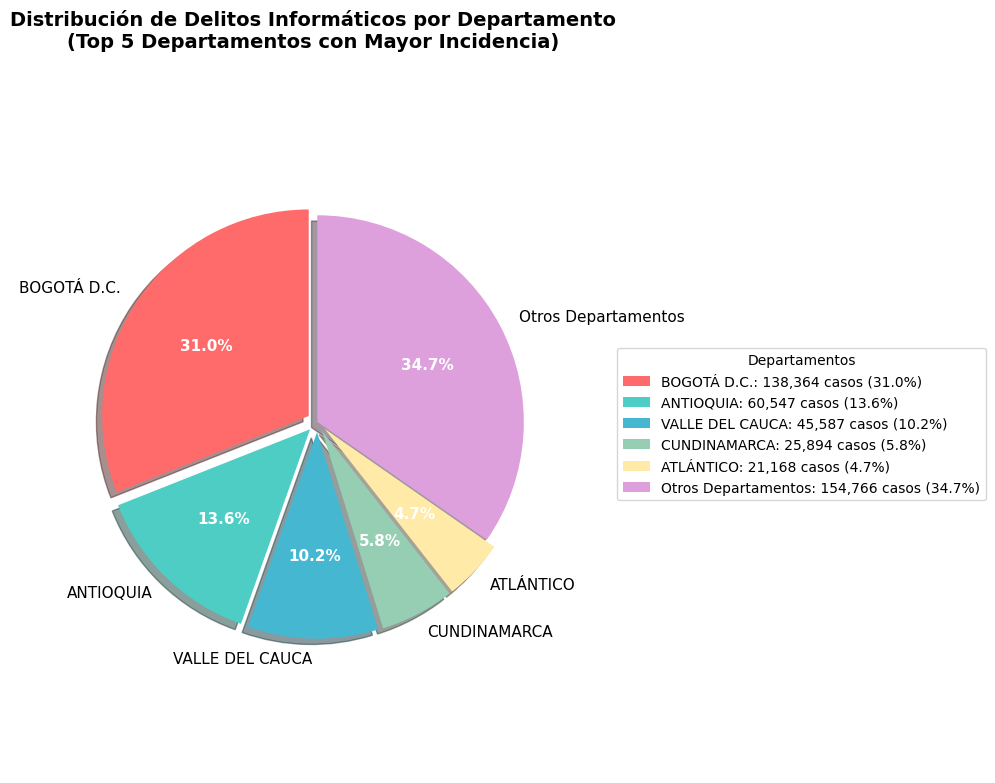


 PASO 3: ANÁLISIS DETALLADO DE DISTRIBUCIÓN

 CONCENTRACIÓN GEOGRÁFICA:
• Los 5 departamentos principales concentran: 65.3% de los casos
• Los demás 28 departamentos tienen: 154,766 casos (34.7%)

 COMPARACIÓN ENTRE DEPARTAMENTOS TOP 5:
• BOGOTÁ D.C. tiene 6.5 veces más casos que ATLÁNTICO
• Diferencia absoluta: 117,196 casos

 PASO 4: ANÁLISIS POR REGIONES NATURALES
Región               Casos           Porcentaje
---------------------------------------------
REGION ANDINA        290,766         65.1      %
REGION PACIFICA      62,947          14.1      %
REGION CARIBE        40,350          9.0       %
OTRA REGIÓN          36,236          8.1       %
REGION ORINOQUIA     14,235          3.2       %
REGION AMAZONIA      1,792           0.4       %

FASE 4 COMPLETADA - ALEJANDRO SOA
Análisis descriptivo regional completado
Próximo paso: Visualizaciones individuales


In [ ]:
"""
PROYECTO FINAL - DELITOS INFORMÁTICOS COLOMBIA
==============================================
FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL
Responsable: ALEJANDRO SOA
Pregunta: ¿Cómo se distribuyen los casos entre departamentos?
"""

print("="*70)
print("FASE 4: ANÁLISIS DESCRIPTIVO REGIONAL")
print("RESPONSABLE: ALEJANDRO SOA")
print("Gráfico asignado: Pastel - Top 5 departamentos")
print("="*70)

import matplotlib.pyplot as plt

# 1. Preparar datos para gráfico de pastel
print(" PASO 1: PREPARANDO DATOS PARA ANÁLISIS...")

# Verificar que tenemos la columna de departamento
if 'depto_col' not in locals():
    print(" No se encontró la columna de departamento")
    # Buscar automáticamente
    for col in df.columns:
        if 'departamento' in col.lower():
            depto_col = col
            print(f" Columna encontrada: {depto_col}")
            break

# Obtener top 5 departamentos
top_5 = df[depto_col].value_counts().head(5)
otros = df[depto_col].value_counts().iloc[5:].sum()

# Crear datos para el pastel
labels = list(top_5.index) + ['Otros Departamentos']
sizes = list(top_5.values) + [otros]
total_casos = sum(sizes)

print(f"\n DATOS PARA GRÁFICO DE PASTEL:")
for i, (depto, cantidad) in enumerate(zip(labels, sizes), 1):
    porcentaje = (cantidad / total_casos) * 100
    print(f"  {i}. {depto}: {cantidad:,} casos ({porcentaje:.1f}%)")

# 2. Crear gráfico de pastel
print("\n PASO 2: CREANDO GRÁFICO DE PASTEL...")

plt.figure(figsize=(10, 8))

# Colores atractivos
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Crear el pastel
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colores,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0),
    shadow=True
)

# Mejorar estética
plt.setp(autotexts, size=11, weight="bold", color='white')
plt.setp(texts, size=11)

# Título y detalles
plt.title(
    'Distribución de Delitos Informáticos por Departamento\n(Top 5 Departamentos con Mayor Incidencia)',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Leyenda
plt.legend(
    wedges,
    [f'{label}: {size:,} casos ({(size/total_casos)*100:.1f}%)'
     for label, size in zip(labels, sizes)],
    title="Departamentos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()

# 3. Análisis detallado de la distribución
print("\n PASO 3: ANÁLISIS DETALLADO DE DISTRIBUCIÓN")

# Concentración en top 5
concentracion_top5 = (top_5.sum() / total_casos) * 100
print(f"\n CONCENTRACIÓN GEOGRÁFICA:")
print(f"• Los 5 departamentos principales concentran: {concentracion_top5:.1f}% de los casos")
print(f"• Los demás {df[depto_col].nunique() - 5} departamentos tienen: {otros:,} casos ({(otros/total_casos)*100:.1f}%)")

# Comparación entre departamentos
print(f"\n COMPARACIÓN ENTRE DEPARTAMENTOS TOP 5:")
departamento_mayor = top_5.index[0]
departamento_menor_top5 = top_5.index[-1]
relacion = top_5.iloc[0] / top_5.iloc[-1]

print(f"• {departamento_mayor} tiene {relacion:.1f} veces más casos que {departamento_menor_top5}")
print(f"• Diferencia absoluta: {top_5.iloc[0] - top_5.iloc[-1]:,} casos")

# 4. Análisis por regiones (agrupación manual)
print(f"\n PASO 4: ANÁLISIS POR REGIONES NATURALES")

# Definir regiones de Colombia
regiones = {
    'REGION ANDINA': ['BOGOTÁ D.C.', 'CUNDINAMARCA', 'ANTIOQUIA', 'SANTANDER',
                      'BOYACÁ', 'NARIÑO', 'TOLIMA', 'HUILA', 'CALDAS', 'RISARALDA'],
    'REGION CARIBE': ['ATLÁNTICO', 'BOLÍVAR', 'SUCRE', 'CÓRDOBA', 'MAGDALENA',
                      'LA GUAJIRA', 'CESAR'],
    'REGION PACIFICA': ['VALLE DEL CAUCA', 'CAUCA', 'CHOCO', 'NARIÑO'],
    'REGION ORINOQUIA': ['META', 'CASANARE', 'ARAUCA', 'VICHADA'],
    'REGION AMAZONIA': ['AMAZONAS', 'CAQUETÁ', 'PUTUMAYO', 'GUAVIARE']
}

# Clasificar departamentos en regiones
df['REGION'] = 'OTRA REGIÓN'
for region, departamentos in regiones.items():
    for depto in departamentos:
        df.loc[df[depto_col].str.contains(depto, case=False, na=False), 'REGION'] = region

# Analizar distribución por región
distribucion_region = df['REGION'].value_counts()
print(f"{'Región':<20} {'Casos':<15} {'Porcentaje':<10}")
print("-"*45)

for region, cantidad in distribucion_region.items():
    porcentaje = (cantidad / len(df)) * 100
    print(f"{region:<20} {cantidad:<15,} {porcentaje:<10.1f}%")

print("\n" + "="*70)
print("FASE 4 COMPLETADA - ALEJANDRO SOA")
print("Análisis descriptivo regional completado")
print("Próximo paso: Visualizaciones individuales")
print("="*70)

# Visualizaciones/Graficos **individuales**

VISUALIZACIÓN 1: GRÁFICO DE BARRAS
Responsable: ANDRÉS PADILLA
Pregunta: ¿Qué tipos de delitos son más frecuentes?


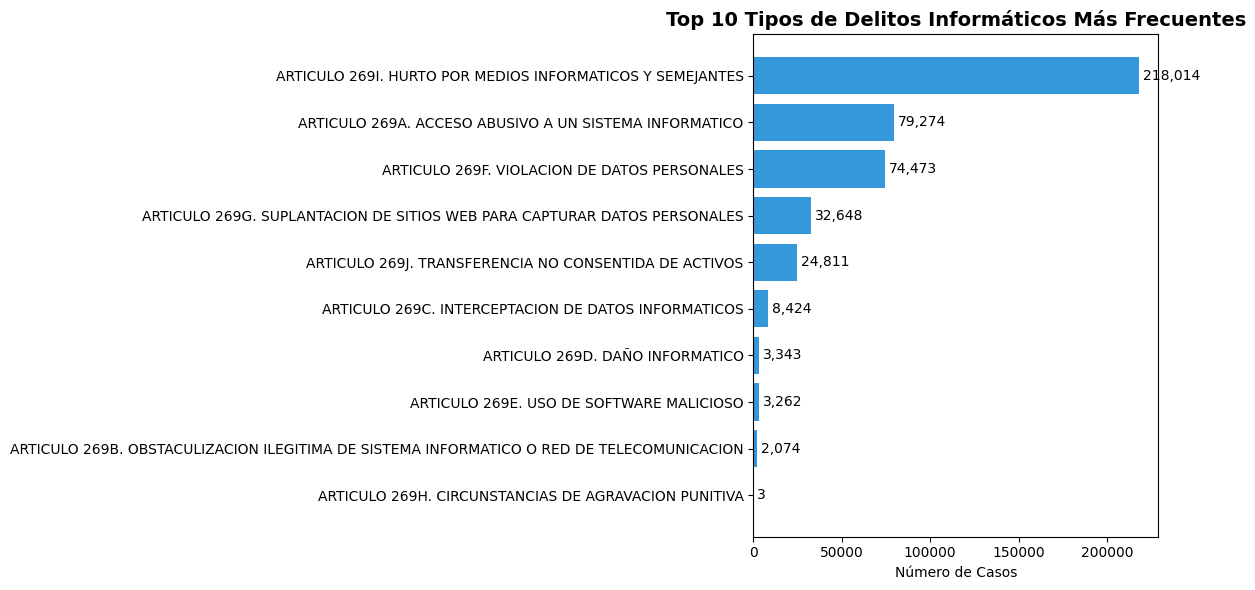


 ANÁLISIS DE RESULTADOS:
• Total tipos de delito únicos: 10
• Delito más frecuente: 'ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES' (218,014 casos)
• Concentración en top 5: 96.2%


In [11]:
# Gráfico 1: Andrés Padilla - Barras por tipo de delito
print("VISUALIZACIÓN 1: GRÁFICO DE BARRAS")
print("Responsable: ANDRÉS PADILLA")
print("Pregunta: ¿Qué tipos de delitos son más frecuentes?")

# Buscar columna de tipo de delito
delito_col = None
for col in df.columns:
    if 'descripcion' in col.lower() or 'conducta' in col.lower():
        delito_col = col
        break

if delito_col:
    # Top 10 delitos más comunes
    top_delitos = df[delito_col].value_counts().head(10)

    # Crear gráfico
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(top_delitos)), top_delitos.values, color='#3498db')
    plt.yticks(range(len(top_delitos)), top_delitos.index)
    plt.xlabel('Número de Casos')
    plt.title('Top 10 Tipos de Delitos Informáticos Más Frecuentes', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Agregar valores
    for i, (bar, valor) in enumerate(zip(bars, top_delitos.values)):
        plt.text(valor + max(top_delitos.values)*0.01, i, f'{valor:,}', va='center')

    plt.tight_layout()
    plt.show()

    # Análisis
    print(f"\n ANÁLISIS DE RESULTADOS:")
    print(f"• Total tipos de delito únicos: {df[delito_col].nunique()}")
    print(f"• Delito más frecuente: '{top_delitos.index[0]}' ({top_delitos.iloc[0]:,} casos)")
    print(f"• Concentración en top 5: {(top_delitos.head(5).sum()/len(df))*100:.1f}%")
else:
    print("No se encontró columna de tipo de delito")